<a href="https://colab.research.google.com/github/D-Rasheed/Heart-Disease-Prediction-Using-Machine-Learning/blob/main/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [7]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


Reading the data

In [8]:
df=pd.read_csv('heart.csv')

In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Data Exploration

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


There are five categorical and seven numerical features in the data.


In [11]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We have zero null values in our data.

LABELLING OUR TARGET VARIABLE

In [12]:
label_dict = {1: 'Heart Disease', 0: 'Normal'}
df['HeartDisease'] = df['HeartDisease'].map(label_dict)

Checking age distribution in our dataset.

In [13]:
min_age=df['Age'].min()
max_age=df['Age'].max()
Average_age=df['Age'].mean()
print(f'The minimum age in our dataset : {min_age} years')
print(f'The maximum age in our dataset : {max_age} years')
print(f'The average age in our dataset : {Average_age} years')

The minimum age in our dataset : 28 years
The maximum age in our dataset : 77 years
The average age in our dataset : 53.510893246187365 years


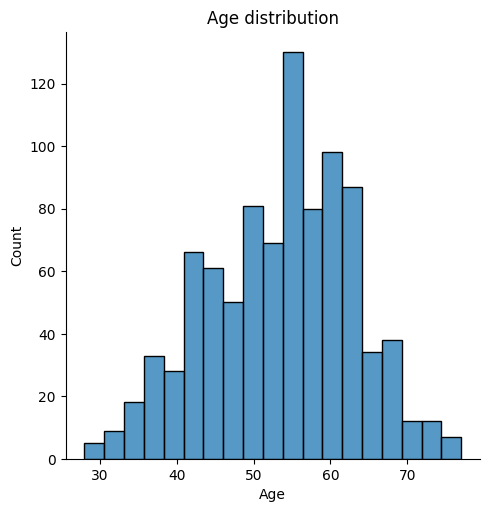

In [14]:
sns.displot(df, x='Age')
plt.title('Age distribution')
plt.show()

The majority of patient lies in between 50-55 years of age.

Text(0.5, 1.0, 'Age nad Heart Disease')

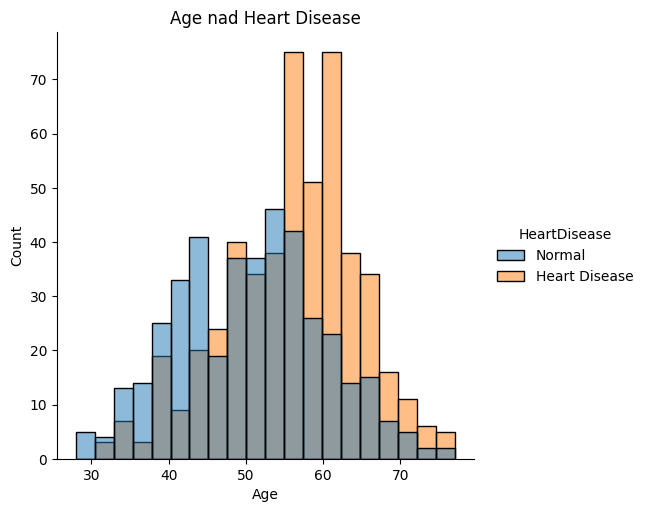

In [15]:
sns.displot(data=df,x='Age',hue='HeartDisease',bins=20)
plt.title('Age nad Heart Disease')

In [16]:
df.groupby('Sex')['Age'].mean()

Sex
F    52.492228
M    53.782069
Name: Age, dtype: float64

So, in our data set both gender have average age of 52 and 53 years.

##### Distribution of Sex Feature

M    725
F    193
Name: Sex, dtype: int64

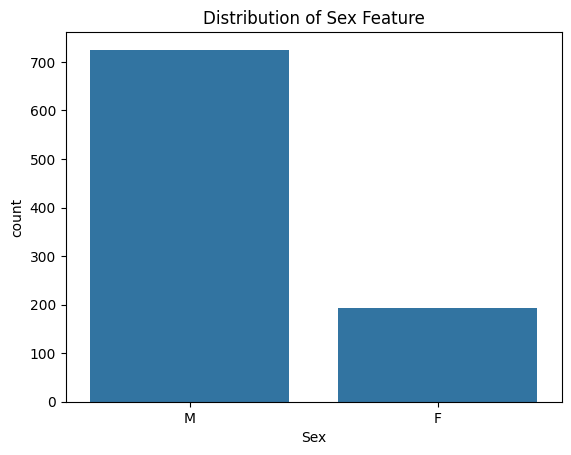

In [17]:
display(df['Sex'].value_counts())
sns.countplot(x="Sex", data = df)
plt.title('Distribution of Sex Feature')
plt.show()

Comparison the ratio of Heart disease between Male and Female

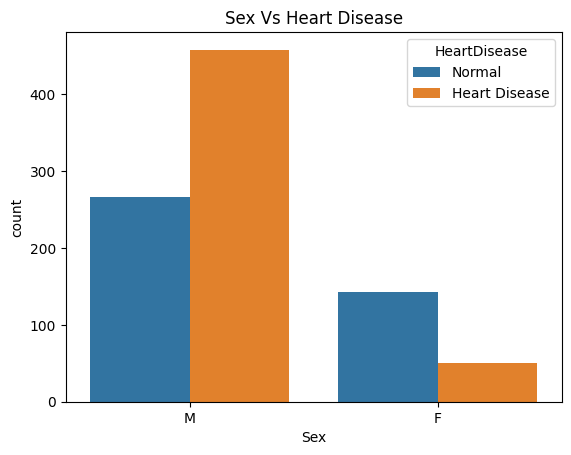

In [18]:
sns.countplot(data=df,x='Sex',hue='HeartDisease')
plt.title('Sex Vs Heart Disease')
plt.show()

From the above visualization,It is visible that male is more prone to heart disease.

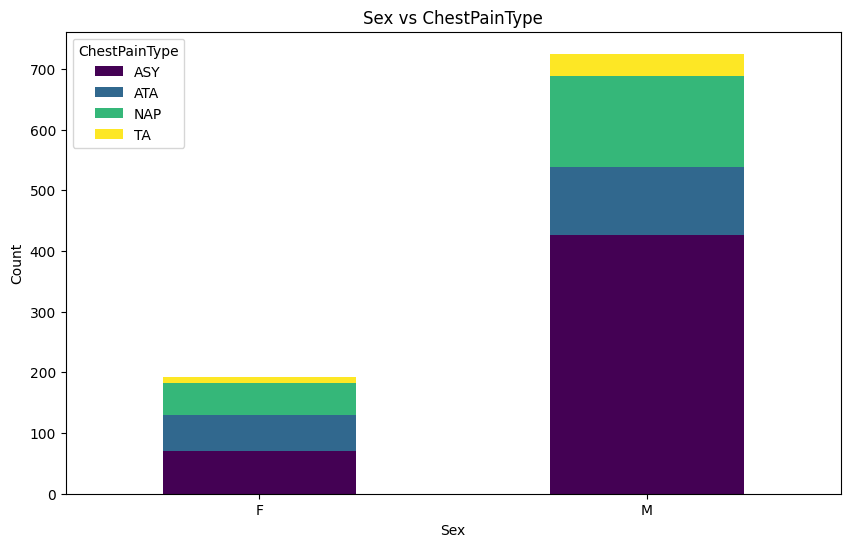

In [19]:

# Group data by Sex and ChestPainType and count occurrences
df_grouped = df.groupby(['Sex', 'ChestPainType']).size().unstack(fill_value=0)

# Plot grouped bar plot
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Sex vs ChestPainType')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='ChestPainType')
plt.show()


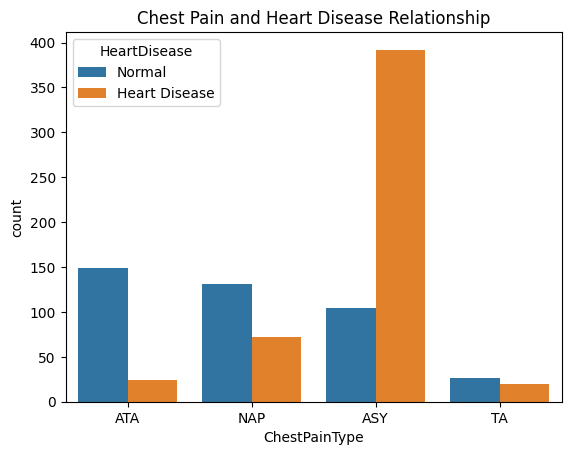

In [20]:
sns.countplot(data = df,x="ChestPainType", hue = 'HeartDisease')
plt.title('Chest Pain and Heart Disease Relationship')
plt.show()


*)The plot indicates that patients experiencing Asymptomatic Chest Pain are more prone to developing Heart Failure.

*)Patients exhibiting typical Angina also face an high risk of Heart Failure.

Text(0.5, 1.0, 'Cholesterol Distribution')

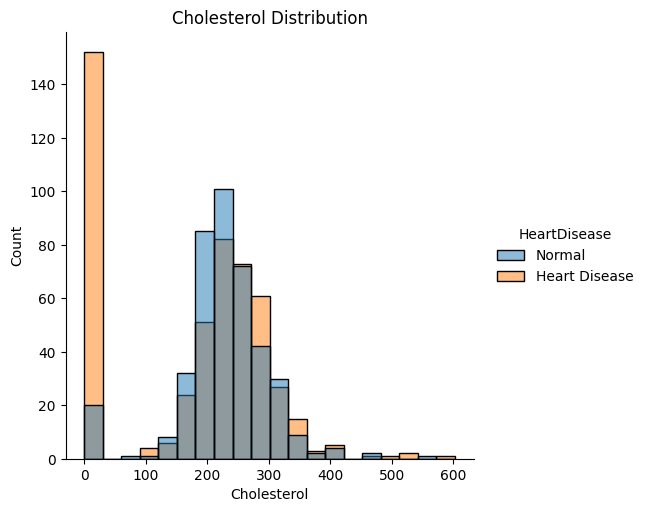

In [21]:

sns.displot(data=df,x='Cholesterol',bins=20, hue='HeartDisease')
plt.title('Cholesterol Distribution')


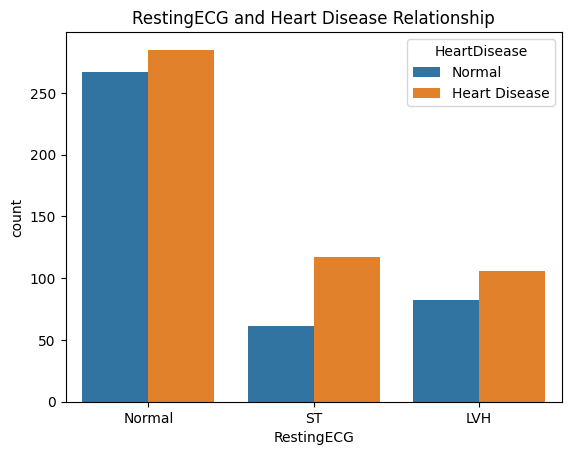

In [22]:
sns.countplot(data=df,x='RestingECG',hue='HeartDisease')
plt.title('RestingECG and Heart Disease Relationship')
plt.show()

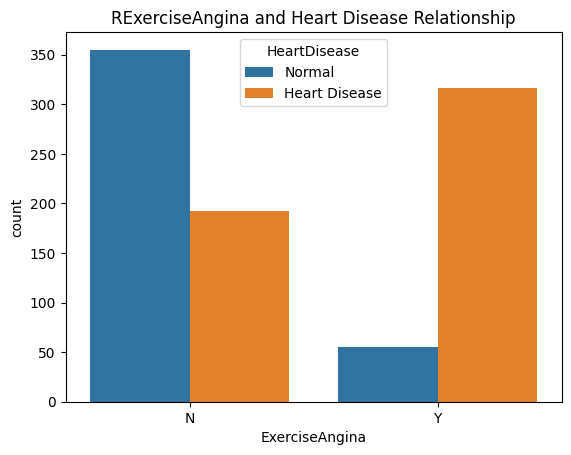

In [23]:
sns.countplot(data=df,x='ExerciseAngina',hue='HeartDisease')
plt.title('RExerciseAngina and Heart Disease Relationship')
plt.show()

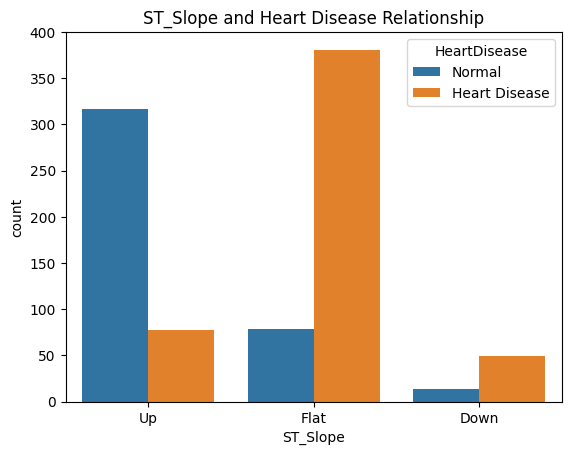

In [24]:
sns.countplot(data=df,x='ST_Slope',hue='HeartDisease')
plt.title('ST_Slope and Heart Disease Relationship')
plt.show()

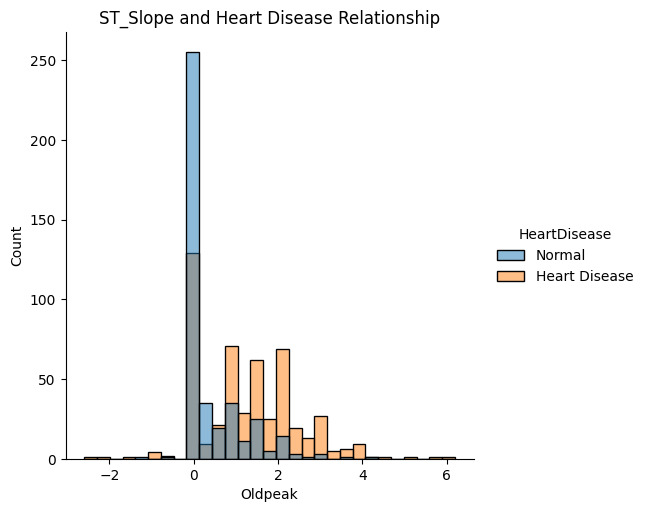

In [25]:
sns.displot(data=df,x='Oldpeak',hue='HeartDisease')
plt.title('ST_Slope and Heart Disease Relationship')
plt.show()

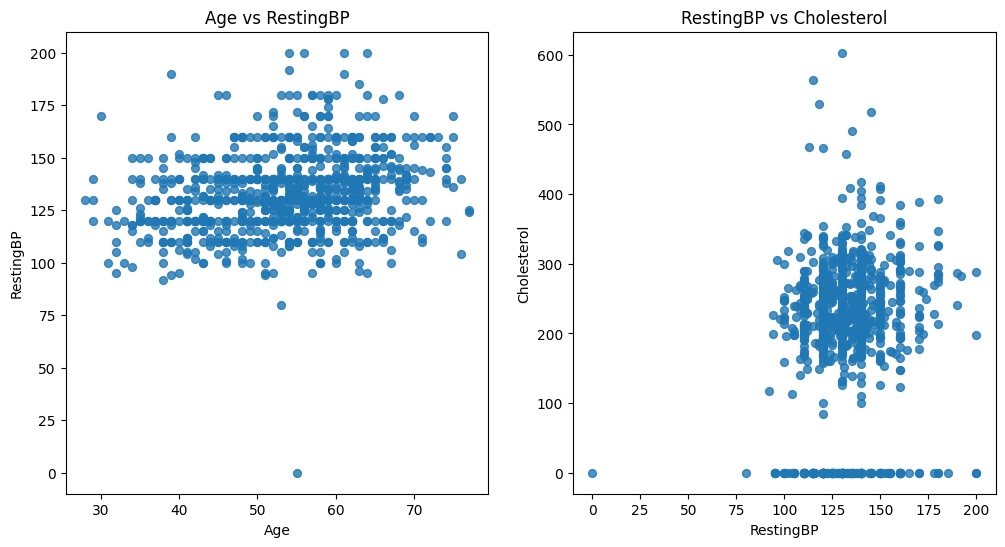

In [26]:
# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Age vs RestingBP
df.plot(kind='scatter', x='Age', y='RestingBP', s=32, alpha=.8, ax=axs[0])
axs[0].set_title('Age vs RestingBP')


# Plot RestingBP vs Cholesterol
df.plot(kind='scatter', x='RestingBP', y='Cholesterol', s=32, alpha=.8, ax=axs[1])
axs[1].set_title('RestingBP vs Cholesterol')

# Show the plots
plt.show()


<ipython-input-27-f69ac433db1c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Age', y='ExerciseAngina', inner='box', palette='Dark2', ax=axes[0])
<ipython-input-27-f69ac433db1c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Age', y='RestingECG', inner='box', palette='Dark2', ax=axes[1])


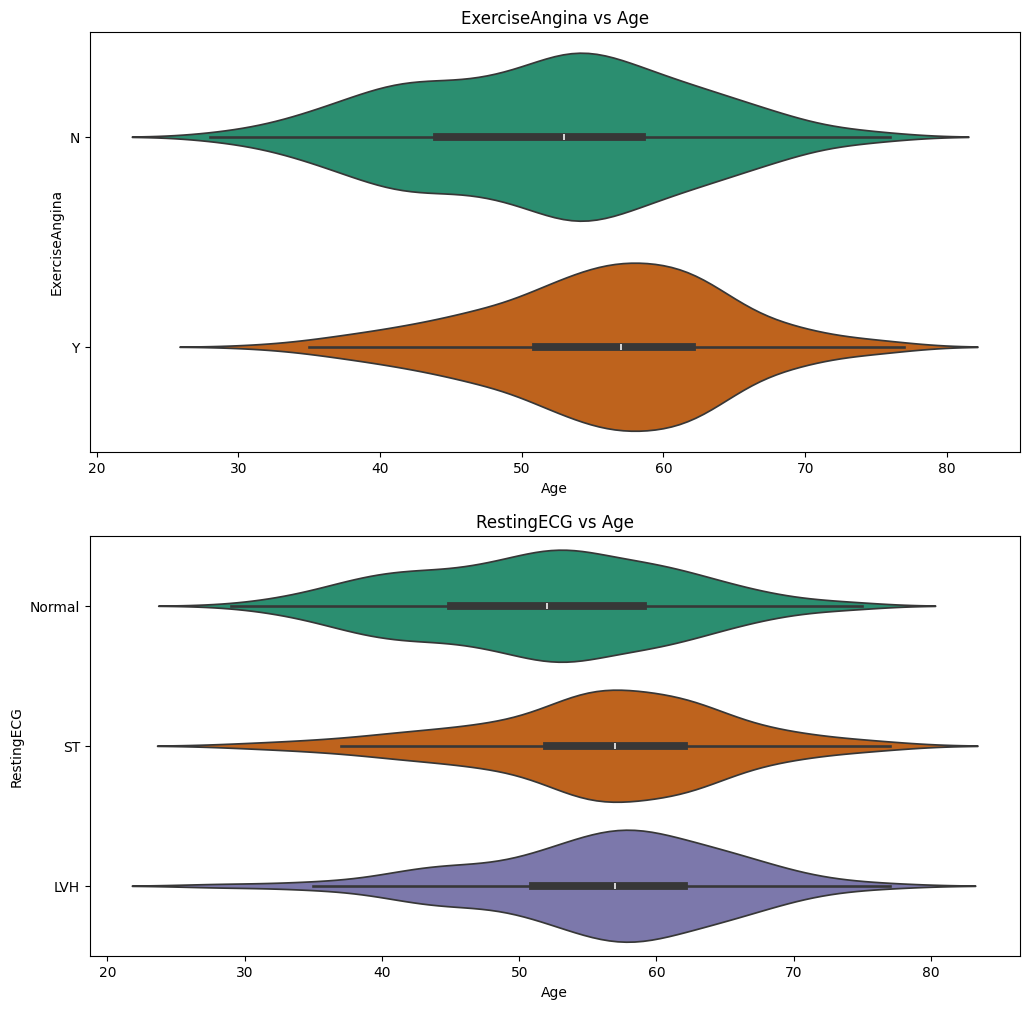

In [27]:
# Create subplots for ExerciseAngina vs Age and RestingECG vs Age
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot ExerciseAngina vs Age
sns.violinplot(data=df, x='Age', y='ExerciseAngina', inner='box', palette='Dark2', ax=axes[0])
axes[0].set_title('ExerciseAngina vs Age')
axes[0].set_ylabel('ExerciseAngina')
axes[0].set_xlabel('Age')

# Plot RestingECG vs Age
sns.violinplot(data=df, x='Age', y='RestingECG', inner='box', palette='Dark2', ax=axes[1])
axes[1].set_title('RestingECG vs Age')
axes[1].set_ylabel('RestingECG')
axes[1].set_xlabel('Age')

# Adjust layout


# Show the plots
plt.show()


<ipython-input-28-f3d550ca51fa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Age', y='ChestPainType', inner='box', palette='Dark2', ax=axes[0])
<ipython-input-28-f3d550ca51fa>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Age', y='HeartDisease', inner='box', palette='Dark2', ax=axes[1])


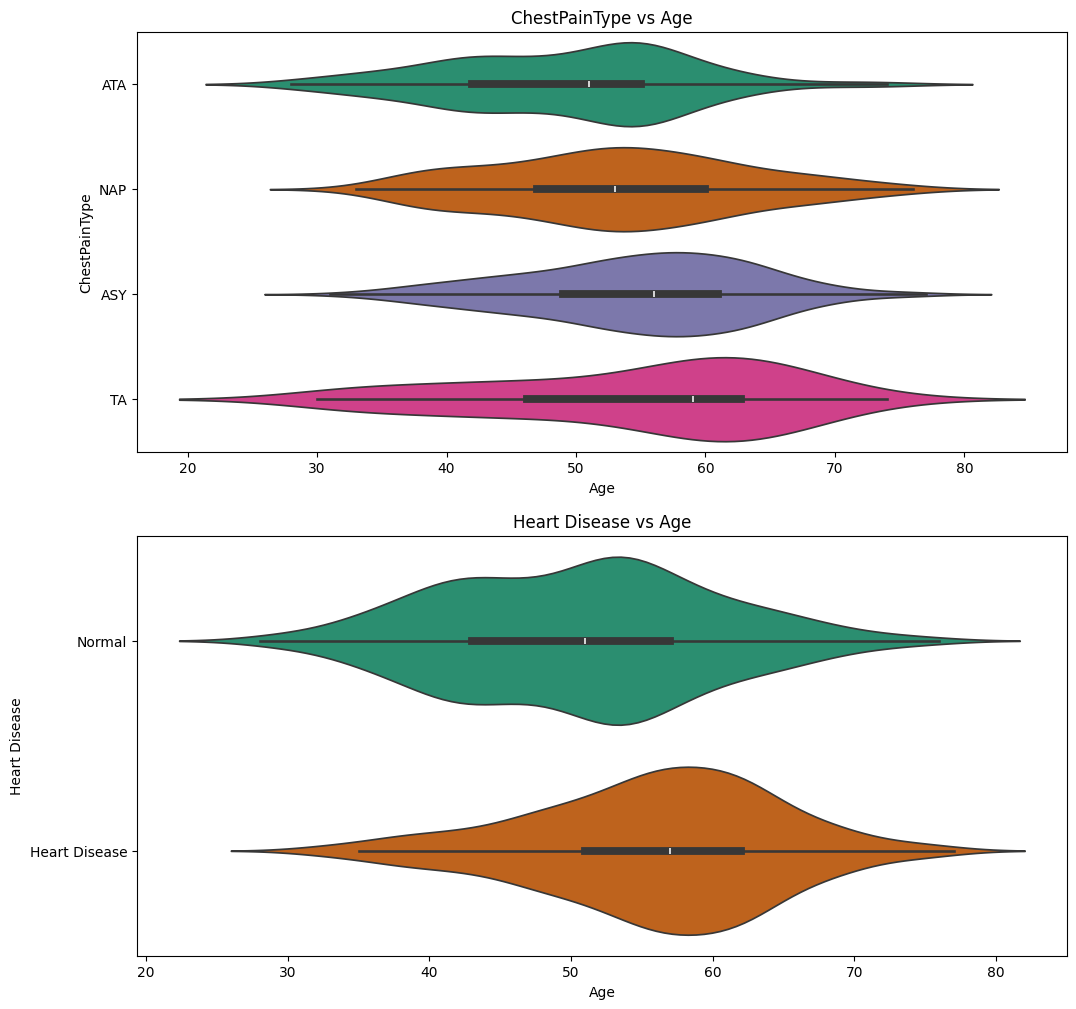

In [28]:
# Create subplots for ChestPainType vs Age and Sex vs Age
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot ChestPainType vs Age
sns.violinplot(data=df, x='Age', y='ChestPainType', inner='box', palette='Dark2', ax=axes[0])
axes[0].set_title('ChestPainType vs Age')
axes[0].set_ylabel('ChestPainType')
axes[0].set_xlabel('Age')

# Plot Sex vs Age
sns.violinplot(data=df, x='Age', y='HeartDisease', inner='box', palette='Dark2', ax=axes[1])
axes[1].set_title('Heart Disease vs Age')
axes[1].set_ylabel('Heart Disease')
axes[1].set_xlabel('Age')

plt.show()


### LABEL ENCODING

In [29]:
categorical_feat = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
Numeric_feat = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [30]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
for i in categorical_feat:
    df[i]=le.fit_transform(df[i])

In [31]:
df.head()
#checking the data after encoding

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,1
1,49,0,2,160,180,0,1,156,0,1.0,1,0
2,37,1,1,130,283,0,2,98,0,0.0,2,1
3,48,0,0,138,214,0,1,108,1,1.5,1,0
4,54,1,2,150,195,0,1,122,0,0.0,2,1
